In [1]:
import torch
from JAAEC import AmazingAutoEncoder
import data
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
from sklearn.preprocessing import StandardScaler

In [2]:
out = torch.load("/home/bugsie/PycharmProjects/MagNet/JAAEC_MagNet/3rri3e09/checkpoints/epoch=141-step=134843.ckpt")
out.keys()
model = AmazingAutoEncoder((1, 10_000, 8), (1, 16), 1e-6, num_layers=2, num_heads=2)
model.load_state_dict(out["state_dict"])
script = model.encoder.to_torchscript()
script = torch.jit.optimize_for_inference(script)

/home/bugsie/mambaforge/envs/MagNetProject/lib/python3.10/site-packages/torch/jit/_recursive.py:266: UserWarning: 'batch_first' was found in ScriptModule constants, but was not actually set in __init__. Consider removing it.
  warnings.warn("'{}' was found in ScriptModule constants, "


In [3]:
datamodule = data.DataModule("data", batch_size=1, num_workers=16)
datamodule.prepare_data()
datamodule.setup()

data/3C90
data/3C90/0_1_1_Parameters.csv
data/3C90/0_1_1_Data_Time.csv
data/3C90/0_1_1_Data_Volt.csv
data/3C90/0_1_1_Data_Curr.csv
data/3C95
data/3C95/0_1_1_Parameters.csv
data/3C95/0_1_1_Data_Time.csv
data/3C95/0_1_1_Data_Volt.csv
data/3C95/0_1_1_Data_Curr.csv
data/3E6
data/3E6/0_1_1_Parameters.csv
data/3E6/0_1_1_Data_Time.csv
data/3E6/0_1_1_Data_Volt.csv
data/3E6/0_1_1_Data_Curr.csv
data/3F4
data/3F4/0_1_1_Parameters.csv
data/3F4/0_1_1_Data_Time.csv
data/3F4/0_1_1_Data_Volt.csv
data/3F4/0_1_1_Data_Curr.csv
data/3C94
data/3C94/0_1_1_Parameters.csv
data/3C94/0_1_1_Data_Time.csv
data/3C94/0_1_1_Data_Volt.csv
data/3C94/0_1_1_Data_Curr.csv


In [4]:
datamodule.materials

{'data/3C90': tensor([[[-6.5921e-02,  0.0000e+00, -2.0000e-02,  ...,  0.0000e+00,
            5.0119e+04,  2.8184e-02],
          [-6.6938e-02,  8.0000e-09, -8.0000e-03,  ...,  0.0000e+00,
            5.0119e+04,  2.8184e-02],
          [-6.6124e-02,  1.6000e-08,  0.0000e+00,  ...,  0.0000e+00,
            5.0119e+04,  2.8184e-02],
          ...,
          [-6.6328e-02,  7.9976e-05,  1.3600e-01,  ...,  0.0000e+00,
            5.0119e+04,  2.8184e-02],
          [-6.6328e-02,  7.9984e-05,  1.5200e-01,  ...,  0.0000e+00,
            5.0119e+04,  2.8184e-02],
          [-6.6124e-02,  7.9992e-05,  1.5200e-01,  ...,  0.0000e+00,
            5.0119e+04,  2.8184e-02]],
 
         [[-7.1821e-02,  0.0000e+00, -2.4000e-02,  ...,  0.0000e+00,
            5.0119e+04,  3.1623e-02],
          [-7.1821e-02,  8.0000e-09, -2.0000e-02,  ...,  0.0000e+00,
            5.0119e+04,  3.1623e-02],
          [-7.1211e-02,  1.6000e-08,  4.0000e-03,  ...,  0.0000e+00,
            5.0119e+04,  3.1623e-02],
      

In [41]:
predictions = {}

for material in datamodule.materials.keys():
    predictions[material] = []
    for i, sample in enumerate(datamodule.materials[material]):
        predictions[material].append(script(sample.unsqueeze(0)).squeeze(0).detach().numpy())
        print(f"Finished {material} {i}")

predictions

Finished data/3C90 0
Finished data/3C90 1
Finished data/3C90 2
Finished data/3C90 3
Finished data/3C90 4
Finished data/3C90 5
Finished data/3C90 6
Finished data/3C90 7
Finished data/3C90 8
Finished data/3C90 9
Finished data/3C90 10
Finished data/3C90 11
Finished data/3C90 12
Finished data/3C90 13
Finished data/3C90 14
Finished data/3C90 15
Finished data/3C90 16
Finished data/3C90 17
Finished data/3C90 18
Finished data/3C90 19
Finished data/3C90 20
Finished data/3C90 21
Finished data/3C90 22
Finished data/3C90 23
Finished data/3C90 24
Finished data/3C90 25
Finished data/3C90 26
Finished data/3C90 27
Finished data/3C90 28
Finished data/3C90 29
Finished data/3C90 30
Finished data/3C90 31
Finished data/3C90 32
Finished data/3C90 33
Finished data/3C90 34
Finished data/3C90 35
Finished data/3C90 36
Finished data/3C90 37
Finished data/3C90 38
Finished data/3C90 39
Finished data/3C90 40
Finished data/3C90 41
Finished data/3C90 42
Finished data/3C90 43
Finished data/3C90 44
Finished data/3C90 4

{'data/3C90': [array([3.086399 , 3.0864186, 3.0863225, 3.0863044, 3.0864   , 3.0864182,
         3.0863216, 3.0863047, 3.0864005, 3.0864177, 3.0863214, 3.0863051,
         3.086402 , 3.0864167, 3.0863192, 3.0863051], dtype=float32),
  array([3.0864031, 3.086424 , 3.08632  , 3.0863   , 3.0864034, 3.0864232,
         3.0863194, 3.0863004, 3.0864048, 3.0864224, 3.0863185, 3.0863004,
         3.0864053, 3.0864215, 3.0863175, 3.0863008], dtype=float32),
  array([3.0864096, 3.0864317, 3.086314 , 3.0862923, 3.086411 , 3.08643  ,
         3.086313 , 3.0862932, 3.0864122, 3.0864296, 3.086312 , 3.0862947,
         3.0864139, 3.0864286, 3.0863109, 3.0862942], dtype=float32),
  array([3.0864155, 3.0864415, 3.0863094, 3.0862837, 3.0864165, 3.0864415,
         3.0863085, 3.0862846, 3.0864177, 3.08644  , 3.086307 , 3.0862854,
         3.086419 , 3.0864398, 3.086306 , 3.0862868], dtype=float32),
  array([3.0864234, 3.0864527, 3.086305 , 3.0862749, 3.0864258, 3.086452 ,
         3.0863037, 3.0862756, 3

In [42]:
scaler = StandardScaler()
scaler = scaler.fit(np.vstack([arr for arr in predictions.values()]))

In [43]:
scaled_prediction = {}

for key in predictions.keys():
    scaled_prediction[key] = scaler.transform(predictions[key])

In [88]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)

In [89]:
reduced_predictions = {}

pca.fit(np.vstack([arr for arr in scaled_prediction.values()]))

for key in scaled_prediction.keys():
    reduced_predictions[key] = pca.transform(scaled_prediction[key])

In [90]:
pca.explained_variance_ratio_

array([0.24627368, 0.19756493, 0.15703252, 0.13596746, 0.11652212])

In [95]:
prediction_reduction_mean = {}

for key in reduced_predictions.keys():
    prediction_reduction_mean[key] = np.mean(reduced_predictions[key], axis=0)

In [99]:
import pandas as pd

In [101]:
prediction_reduction_mean_pd = pd.DataFrame(prediction_reduction_mean)

<Axes: >

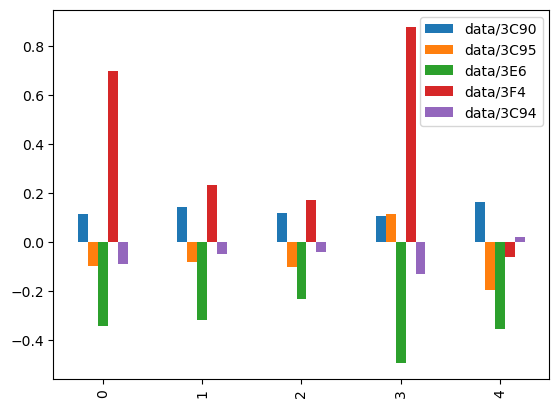

In [103]:
prediction_reduction_mean_pd.plot.bar()